In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import os
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms, datasets

# Defining directories
task1_train_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-1/Train"
task1_test_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-1/Test"
task1_val_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-1/Val"

task2_train_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-2/Train"
task2_test_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-2/Test"
task2_val_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-2/Val"

task3_train_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train"
task3_test_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Test"
task3_val_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Val"

task4_train_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-4/Train"
task4_test_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-4/Test"
task4_val_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-4/Val"

In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir("/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts")

There are 4 directories and 0 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train'.
There are 0 directories and 1200 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train/eggplant__healthy'.
There are 0 directories and 1200 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train/eggplant__N'.
There are 0 directories and 1200 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train/eggplant__N_K'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Val'.
There are 0 directories and 150 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480b

# Transform

In [ ]:
import torchvision

In [ ]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # "DEFAULT" = best available weights
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
# Get the transforms used to create our pretrained weights
transform = weights.transforms()
transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
# Loading datasets using ImageFolder
task1_train_dataset = datasets.ImageFolder(root=task1_train_dir, transform=transform)
task1_test_dataset = datasets.ImageFolder(root=task1_test_dir, transform=transform)
task1_val_dataset = datasets.ImageFolder(root=task1_val_dir, transform=transform)

task2_train_dataset = datasets.ImageFolder(root=task2_train_dir, transform=transform)
task2_test_dataset = datasets.ImageFolder(root=task2_test_dir, transform=transform)
task2_val_dataset = datasets.ImageFolder(root=task2_val_dir, transform=transform)

task3_train_dataset = datasets.ImageFolder(root=task3_train_dir, transform=transform)
task3_test_dataset = datasets.ImageFolder(root=task3_test_dir, transform=transform)
task3_val_dataset = datasets.ImageFolder(root=task3_val_dir, transform=transform)

task4_train_dataset = datasets.ImageFolder(root=task4_train_dir, transform=transform)
task4_test_dataset = datasets.ImageFolder(root=task4_test_dir, transform=transform)
task4_val_dataset = datasets.ImageFolder(root=task4_val_dir, transform=transform)

In [ ]:
task1_class_names = task1_train_dataset.classes
task1_class_names

['ash_gourd__N', 'ash_gourd__N_K', 'ash_gourd__healthy']

In [ ]:
task2_class_names = task2_train_dataset.classes
task2_class_names

['bitter_gourd__N', 'bitter_gourd__N_K', 'bitter_gourd__healthy']

In [ ]:
task3_class_names = task3_train_dataset.classes
task3_class_names

['eggplant__N', 'eggplant__N_K', 'eggplant__healthy']

In [ ]:
task4_class_names = task4_train_dataset.classes
task4_class_names

['snake_gourd__N', 'snake_gourd__N_K', 'snake_gourd__healthy']

In [ ]:
# Creating DataLoaders
batch_size = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {batch_size} and {NUM_WORKERS} workers.")

task1_train_loader = torch.utils.data.DataLoader(task1_train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
task1_test_loader = torch.utils.data.DataLoader(task1_test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)
task1_val_loader = torch.utils.data.DataLoader(task1_val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

task2_train_loader = torch.utils.data.DataLoader(task2_train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
task2_test_loader = torch.utils.data.DataLoader(task2_test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)
task2_val_loader = torch.utils.data.DataLoader(task2_val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

task3_train_loader = torch.utils.data.DataLoader(task3_train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
task3_test_loader = torch.utils.data.DataLoader(task3_test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)
task3_val_loader = torch.utils.data.DataLoader(task3_val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

task4_train_loader = torch.utils.data.DataLoader(task4_train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
task4_test_loader = torch.utils.data.DataLoader(task4_test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)
task4_val_loader = torch.utils.data.DataLoader(task4_val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

Creating DataLoader's with batch size 32 and 12 workers.


In [ ]:
def gather_images_and_labels(dataloader):
    all_images = []
    all_labels = []

    for batch in dataloader:
        images, labels = batch
        all_images.append(images)
        all_labels.append(labels)

    all_images_tensor = torch.cat(all_images, dim=0)
    all_labels_tensor = torch.cat(all_labels, dim=0)

    all_images_np = all_images_tensor.numpy()
    all_labels_np = all_labels_tensor.numpy()

    return all_images_np, all_labels_np

In [ ]:
task1_img_train, task1_label_train = gather_images_and_labels(task1_train_loader)
task1_img_test, task1_label_test = gather_images_and_labels(task1_test_loader)
task1_img_val, task1_label_val = gather_images_and_labels(task1_val_loader)

task2_img_train, task2_label_train = gather_images_and_labels(task2_train_loader)
task2_img_test, task2_label_test = gather_images_and_labels(task2_test_loader)
task2_img_val, task2_label_val = gather_images_and_labels(task2_val_loader)

task3_img_train, task3_label_train = gather_images_and_labels(task3_train_loader)
task3_img_test, task3_label_test = gather_images_and_labels(task3_test_loader)
task3_img_val, task3_label_val = gather_images_and_labels(task3_val_loader)

task4_img_train, task4_label_train = gather_images_and_labels(task4_train_loader)
task4_img_test, task4_label_test = gather_images_and_labels(task4_test_loader)
task4_img_val, task4_label_val = gather_images_and_labels(task4_val_loader)

In [ ]:
# Checking the shapes of the numpy arrays
print("Task 1 Training Images shape:", task1_img_train.shape)
print("Task 1 Training Labels shape:", task1_label_train.shape)
print("Task 1 Test Images shape:", task1_img_test.shape)
print("Task 1 Test Labels shape:", task1_label_test.shape)
print("Task 1 Val Images shape:", task1_img_val.shape)
print("Task 1 Val Labels shape:", task1_label_val.shape)

print("Task 2 Training Images shape:", task2_img_train.shape)
print("Task 2 Training Labels shape:", task2_label_train.shape)
print("Task 2 Test Images shape:", task2_img_test.shape)
print("Task 2 Test Labels shape:", task2_label_test.shape)
print("Task 2 Val Images shape:", task2_img_val.shape)
print("Task 2 Val Labels shape:", task2_label_val.shape)

print("Task 3 Training Images shape:", task3_img_train.shape)
print("Task 3 Training Labels shape:", task3_label_train.shape)
print("Task 3 Test Images shape:", task3_img_test.shape)
print("Task 3 Test Labels shape:", task3_label_test.shape)
print("Task 3 Val Images shape:", task3_img_val.shape)
print("Task 3 Val Labels shape:", task3_label_val.shape)

print("Task 4 Training Images shape:", task4_img_train.shape)
print("Task 4 Training Labels shape:", task4_label_train.shape)
print("Task 4 Test Images shape:", task4_img_test.shape)
print("Task 4 Test Labels shape:", task4_label_test.shape)
print("Task 4 Val Images shape:", task4_img_val.shape)
print("Task 4 Val Labels shape:", task4_label_val.shape)

Task 1 Training Images shape: (3600, 3, 224, 224)
Task 1 Training Labels shape: (3600,)
Task 1 Test Images shape: (450, 3, 224, 224)
Task 1 Test Labels shape: (450,)
Task 1 Val Images shape: (450, 3, 224, 224)
Task 1 Val Labels shape: (450,)
Task 2 Training Images shape: (3600, 3, 224, 224)
Task 2 Training Labels shape: (3600,)
Task 2 Test Images shape: (450, 3, 224, 224)
Task 2 Test Labels shape: (450,)
Task 2 Val Images shape: (450, 3, 224, 224)
Task 2 Val Labels shape: (450,)
Task 3 Training Images shape: (3600, 3, 224, 224)
Task 3 Training Labels shape: (3600,)
Task 3 Test Images shape: (450, 3, 224, 224)
Task 3 Test Labels shape: (450,)
Task 3 Val Images shape: (450, 3, 224, 224)
Task 3 Val Labels shape: (450,)
Task 4 Training Images shape: (3600, 3, 224, 224)
Task 4 Training Labels shape: (3600,)
Task 4 Test Images shape: (450, 3, 224, 224)
Task 4 Test Labels shape: (450,)
Task 4 Val Images shape: (450, 3, 224, 224)
Task 4 Val Labels shape: (450,)


# Model

In [ ]:
import torchvision.models as models

In [ ]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 130MB/s] 


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [ ]:
# Print with torchinfo
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary

summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

In [ ]:
# # Freeze all of the base layers in EffNetB0
# for param in model.features.parameters():
#   # print(param)
#   param.requires_grad = False

In [ ]:
# Update the classifier head of our model to suit our problem
from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, # feature vector coming in
              out_features=len(task1_class_names))).to(device) # how many classes do we have?

model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [ ]:
# Print with torchinfo
from torchinfo import summary

summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

In [ ]:
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:

    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:

    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          early_stopping_patience: int = 5,
          save_path: str = 'best_model.pth') -> Dict[str, List]:

    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Initialize variables for early stopping and model saving
    best_loss = float('inf')
    patience_counter = 0

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"val_loss: {test_loss:.4f} | "
          f"val_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        # Check if test loss has improved
        if test_loss < best_loss:
            best_loss = test_loss
            patience_counter = 0  # reset patience counter

            # Save the best model
            torch.save(model.state_dict(), save_path)
            print(f"Best model saved at epoch {epoch+1} with val loss {test_loss:.4f}")

        else:
            patience_counter += 1

        # Early stopping condition
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

    # Return the filled results at the end of the epochs
    return results

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(results):

    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import numpy as np

def test(model: torch.nn.Module,
         dataloader: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module,
         device: torch.device) -> Tuple[float, float]:

    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Lists to store true and predicted labels
    all_preds = []
    all_labels = []

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

            # Store predictions and labels for confusion matrix
            all_preds.append(test_pred_labels.cpu().numpy())
            all_labels.append(y.cpu().numpy())

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    # Concatenate all predictions and labels
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print(f"Test loss {test_loss}")
    print(f"Test accuracy {test_acc}")

    return test_loss, test_acc

    # return test_loss, test_acc


In [ ]:
# import pandas as pd
# import numpy as np

# # Create a dictionary with the data
# data = {
#     'task1': [t1_acc_on_task1, t1_acc_on_task2, t1_acc_on_task3, t1_acc_on_task4],
#     'task2': [None, t2_acc_on_task2, t2_acc_on_task3, t2_acc_on_task4],
#     'task3': [None, None, t3_acc_on_task3, t3_acc_on_task4],
#     'task4': [None, None, None, t4_acc_on_task4]
# }

# # Create row names (index)
# row_names = ['task1', 'task2', 'task3', 'task4']

# # Create the DataFrame
# df = pd.DataFrame(data, index=row_names)

# # Display the DataFrame
# print(df)


# **Applying LwF**


In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Example usage with the given tasks
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)


# 1. Train on Task 1 and Save Soft Targets

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model_lwf/best_model_task1.pth'

In [ ]:
print("Training on Task-1")
print()
print()

# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Setup training and save the results
results = train(model=model,
                       train_dataloader=task1_train_loader,
                       test_dataloader=task1_val_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=100,
                       device=device,
                       early_stopping_patience=10,
                       save_path=save_path)

# End the timer and print out how long it took
end_time = timer()
print()
print()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Training on Task-1




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4572 | train_acc: 0.8263 | val_loss: 0.2395 | val_acc: 0.9146
Best model saved at epoch 1 with val loss 0.2395
Epoch: 2 | train_loss: 0.2129 | train_acc: 0.9239 | val_loss: 0.1943 | val_acc: 0.9396
Best model saved at epoch 2 with val loss 0.1943
Epoch: 3 | train_loss: 0.1329 | train_acc: 0.9560 | val_loss: 0.1924 | val_acc: 0.9229
Best model saved at epoch 3 with val loss 0.1924
Epoch: 4 | train_loss: 0.1053 | train_acc: 0.9657 | val_loss: 0.1484 | val_acc: 0.9417
Best model saved at epoch 4 with val loss 0.1484
Epoch: 5 | train_loss: 0.0888 | train_acc: 0.9696 | val_loss: 0.3395 | val_acc: 0.8958
Epoch: 6 | train_loss: 0.0884 | train_acc: 0.9748 | val_loss: 0.0416 | val_acc: 0.9854
Best model saved at epoch 6 with val loss 0.0416
Epoch: 7 | train_loss: 0.0337 | train_acc: 0.9884 | val_loss: 0.0461 | val_acc: 0.9854
Epoch: 8 | train_loss: 0.0381 | train_acc: 0.9881 | val_loss: 0.0900 | val_acc: 0.9812
Epoch: 9 | train_loss: 0.0451 | train_acc: 0.9853 | val_los

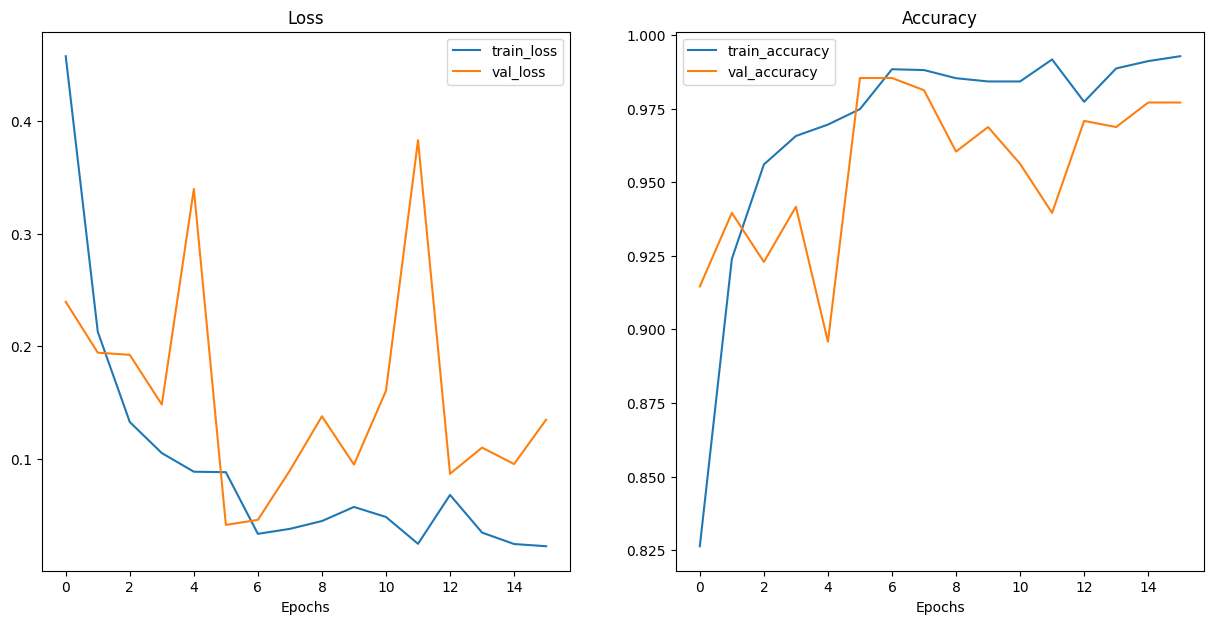

In [ ]:
plot_loss_curves(results)

In [ ]:
# Saving soft targets for Task 1
model.eval()
soft_targets_task1 = []
with torch.no_grad():
    for start in range(0, len(task1_img_train) - 1, 256):
        end = start + 256
        x = torch.from_numpy(task1_img_train[start:end]).float().to(device)
        output = model(x)
        soft_targets_task1.append(output.cpu())
soft_targets_task1 = torch.cat(soft_targets_task1)

Trained on Task-1

Testing on the first task:



<ipython-input-36-993df5cccc9c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


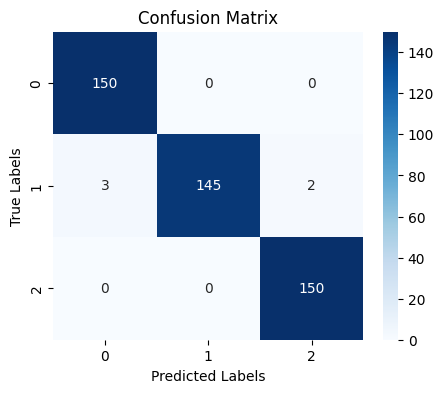

Test loss 0.056636271540628516
Test accuracy 0.9895833333333334


In [ ]:
# Load the saved best model
model.load_state_dict(torch.load(save_path))

# Put the model on the correct device
model.to(device)

print("Trained on Task-1")
print()

print("Testing on the first task:")
print()

t1_loss_on_task1, t1_acc_on_task1 = test(model=model,
    dataloader=task1_test_loader,
    loss_fn=loss_fn,
    device=device)

# 2. Train on Task 2 Using Soft Targets from Task 1

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model_lwf/best_model_task2.pth'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

def distillation_loss(output, target, temperature):
    output = F.log_softmax(output / temperature, dim=1)
    target = F.softmax(target / temperature, dim=1)
    loss = F.kl_div(output, target, reduction='batchmean') * (temperature ** 2)
    return loss

def validate(model, device, x_val_new, t_val_new, criterion):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        x_val, y_val = torch.from_numpy(x_val_new).float(), torch.from_numpy(t_val_new).long()  # No unsqueeze for multi-class
        x_val, y_val = x_val.to(device), y_val.to(device)

        output_val = model(x_val)
        val_loss = criterion(output_val, y_val)

        # Compute validation accuracy
        _, predicted = torch.max(output_val, 1)
        total += y_val.size(0)
        correct += (predicted == y_val).sum().item()

    val_acc = correct / total
    return val_loss.item(), val_acc

def train_lwf(model, device, x_train_new, t_train_new, soft_targets_old, x_val_new, t_val_new, optimizer, epoch, temperature=4.0, alpha=0.7, patience=30, save_path=None):
    model.train()
    batch_size = 256
    criterion = nn.CrossEntropyLoss()

    # Early stopping variables
    best_val_loss = float('inf')
    patience_counter = 0

    # Lists to store training and validation metrics
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch_num in range(epoch):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for start in range(0, len(t_train_new) - 1, batch_size):
            end = start + batch_size
            if end > len(t_train_new):
                end = len(t_train_new)
            x_new, y_new = torch.from_numpy(x_train_new[start:end]).float(), torch.from_numpy(t_train_new[start:end]).long()  # No unsqueeze for multi-class
            soft_target_old = soft_targets_old[start:end]
            x_new, y_new, soft_target_old = x_new.to(device), y_new.to(device), soft_target_old.to(device)

            optimizer.zero_grad()
            output_new = model(x_new)
            loss_new = criterion(output_new, y_new)
            loss_old = distillation_loss(output_new, soft_target_old, temperature)
            loss = alpha * loss_new + (1 - alpha) * loss_old
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(output_new, 1)
            total += y_new.size(0)
            correct += (predicted == y_new).sum().item()

        # Store training loss and accuracy
        train_acc = correct / total
        train_losses.append(running_loss)
        train_accs.append(train_acc)

        # Validate after each epoch
        val_loss, val_acc = validate(model, device, x_val_new, t_val_new, criterion)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch_num + 1}, Training Loss: {running_loss:.6f}, Validation Loss: {val_loss:.6f}, Training Acc: {train_acc:.6f}, Validation Acc: {val_acc:.6f}')

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # Save the best model only if save_path is provided
            if save_path is not None:
                torch.save(model.state_dict(), save_path)
                print(f'Best model saved at epoch {epoch_num + 1} with validation loss {val_loss:.6f}')
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping triggered at epoch {epoch_num + 1}')
            break

    # Plot training and validation loss curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training and validation accuracy curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


Training on Task-2

Epoch 1, Training Loss: 47.778088, Validation Loss: 1.407264, Training Acc: 0.502778, Validation Acc: 0.448889
Best model saved at epoch 1 with validation loss 1.407264
Epoch 2, Training Loss: 38.918549, Validation Loss: 0.847418, Training Acc: 0.645833, Validation Acc: 0.635556
Best model saved at epoch 2 with validation loss 0.847418
Epoch 3, Training Loss: 37.955563, Validation Loss: 0.752240, Training Acc: 0.697222, Validation Acc: 0.724444
Best model saved at epoch 3 with validation loss 0.752240
Epoch 4, Training Loss: 36.705060, Validation Loss: 0.760280, Training Acc: 0.740000, Validation Acc: 0.680000
Epoch 5, Training Loss: 35.249551, Validation Loss: 0.822588, Training Acc: 0.740556, Validation Acc: 0.602222
Epoch 6, Training Loss: 33.070999, Validation Loss: 0.927874, Training Acc: 0.715000, Validation Acc: 0.551111
Epoch 7, Training Loss: 30.960254, Validation Loss: 0.821088, Training Acc: 0.658889, Validation Acc: 0.615556
Epoch 8, Training Loss: 31.08

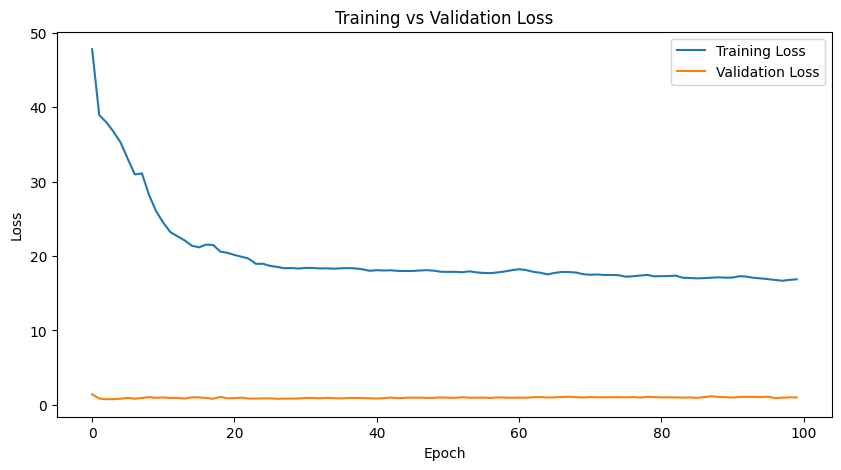

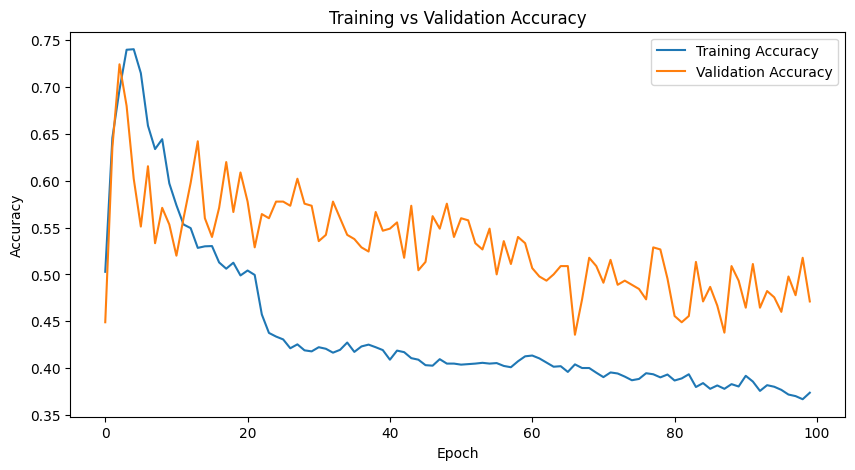

In [ ]:
# Training on Task 2 with LwF
print("Training on Task-2")
print()

train_lwf(
    model=model,
    device=device,
    x_train_new=task2_img_train,
    t_train_new=task2_label_train,
    soft_targets_old=soft_targets_task1,
    x_val_new=task2_img_val,
    t_val_new=task2_label_val,
    optimizer=optimizer,
    epoch=100,
    temperature=2.0,
    alpha=0.5,
    patience=100,
    save_path=save_path  # Specify the save path
)

In [ ]:
# Save soft targets for Task 2
model.eval()
soft_targets_task2 = []
with torch.no_grad():
    for start in range(0, len(task2_img_train) - 1, 256):
        end = start + 256
        x = torch.from_numpy(task2_img_train[start:end]).float().to(device)
        output = model(x)
        soft_targets_task2.append(output.cpu())
soft_targets_task2 = torch.cat(soft_targets_task2)

Trained on Task-2

Testing on the first task:



<ipython-input-41-96a2409627cf>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


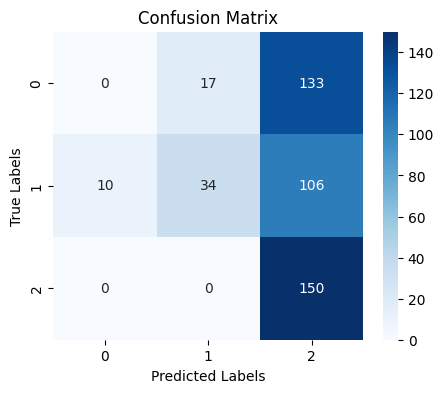

Test loss 1.0433725933233897
Test accuracy 0.44583333333333336
Testing on the second task:



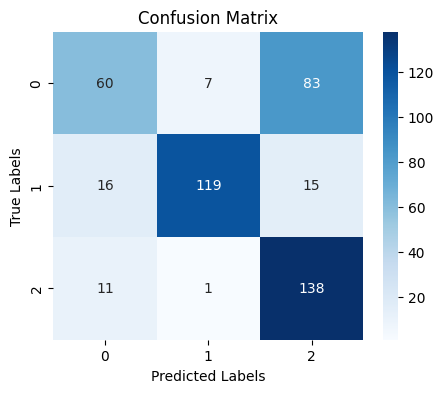

Test loss 0.7325781365235646
Test accuracy 0.7229166666666667


In [ ]:
# Load the saved best model
model.load_state_dict(torch.load(save_path))

# Put the model on the correct device
model.to(device)

print("Trained on Task-2")
print()

print("Testing on the first task:")
print()

t1_loss_on_task2, t1_acc_on_task2 = test(model=model,
    dataloader=task1_test_loader,
    loss_fn=loss_fn,
    device=device)

print("Testing on the second task:")
print()

t2_loss_on_task2, t2_acc_on_task2 = test(model=model,
    dataloader=task2_test_loader,
    loss_fn=loss_fn,
    device=device)

# 3. Train on Task 3 Using Soft Targets from Task 2

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model_lwf/best_model_task3.pth'

Training on Task-3

Epoch 1, Training Loss: 25.307640, Validation Loss: 0.853300, Training Acc: 0.615833, Validation Acc: 0.642222
Best model saved at epoch 1 with validation loss 0.853300
Epoch 2, Training Loss: 24.174091, Validation Loss: 0.724311, Training Acc: 0.733611, Validation Acc: 0.773333
Best model saved at epoch 2 with validation loss 0.724311
Epoch 3, Training Loss: 23.354414, Validation Loss: 0.691798, Training Acc: 0.802778, Validation Acc: 0.802222
Best model saved at epoch 3 with validation loss 0.691798
Epoch 4, Training Loss: 22.471913, Validation Loss: 0.644631, Training Acc: 0.850833, Validation Acc: 0.837778
Best model saved at epoch 4 with validation loss 0.644631
Epoch 5, Training Loss: 21.345147, Validation Loss: 0.674286, Training Acc: 0.860556, Validation Acc: 0.753333
Epoch 6, Training Loss: 20.282365, Validation Loss: 0.622287, Training Acc: 0.840278, Validation Acc: 0.788889
Best model saved at epoch 6 with validation loss 0.622287
Epoch 7, Training Loss: 

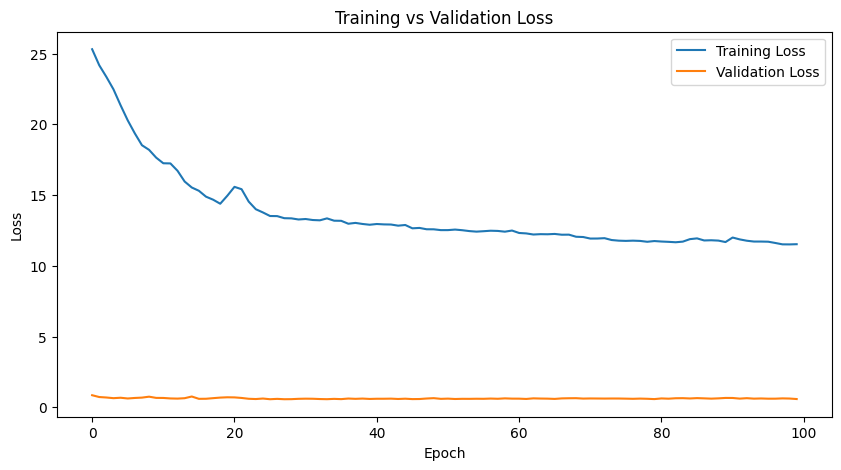

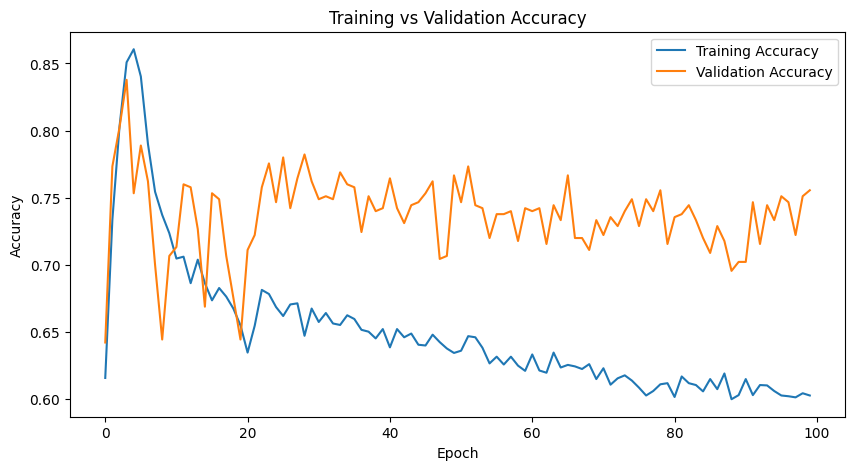

In [ ]:
# Training on Task 3 with LwF
print("Training on Task-3")
print()

train_lwf(
    model=model,
    device=device,
    x_train_new=task3_img_train,
    t_train_new=task3_label_train,
    soft_targets_old=soft_targets_task2,
    x_val_new=task3_img_val,
    t_val_new=task3_label_val,
    optimizer=optimizer,
    epoch=100,
    temperature=2.0,
    alpha=0.5,
    patience=100,
    save_path=save_path  # Specify the save path
)

In [ ]:
# Save soft targets for Task 3
model.eval()
soft_targets_task3 = []
with torch.no_grad():
    for start in range(0, len(task3_img_train) - 1, 256):
        end = start + 256
        x = torch.from_numpy(task3_img_train[start:end]).float().to(device)
        output = model(x)
        soft_targets_task3.append(output.cpu())
soft_targets_task3 = torch.cat(soft_targets_task3)

Trained on Task-3

Testing on the first task:



<ipython-input-45-3fc3cd58ef82>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


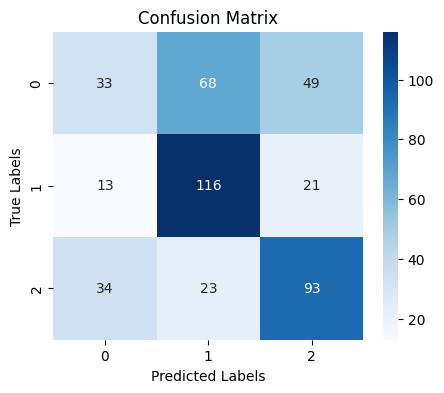

Test loss 1.7928541501363118
Test accuracy 0.5354166666666667

Testing on the second task:



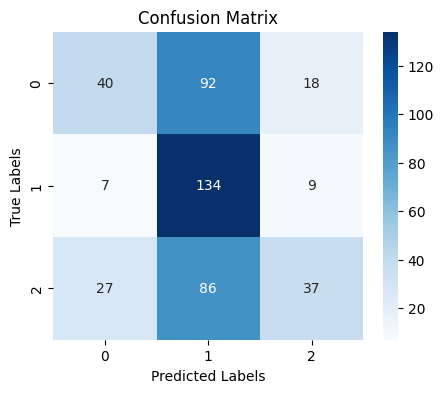

Test loss 1.4208636333545048
Test accuracy 0.4395833333333333

Testing on the third task:



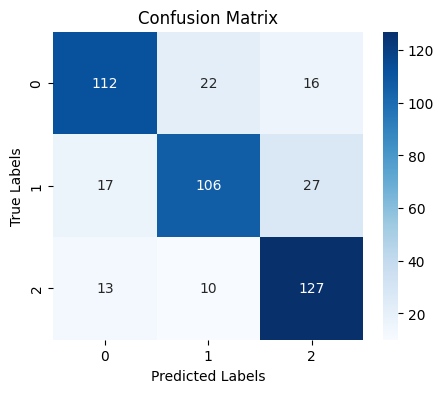

Test loss 0.5888913174470266
Test accuracy 0.75


In [ ]:
# Load the saved best model
model.load_state_dict(torch.load(save_path))

# Put the model on the correct device
model.to(device)

print("Trained on Task-3")
print()

print("Testing on the first task:")
print()

t1_loss_on_task3, t1_acc_on_task3 = test(model=model,
    dataloader=task1_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the second task:")
print()

t2_loss_on_task3, t2_acc_on_task3 = test(model=model,
    dataloader=task2_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the third task:")
print()

t3_loss_on_task3, t3_acc_on_task3 = test(model=model,
    dataloader=task3_test_loader,
    loss_fn=loss_fn,
    device=device)

# 3. Train on Task 4 Using Soft Targets from Task 3

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model_lwf/best_model_task4.pth'

Training on Task-4

Epoch 1, Training Loss: 20.847562, Validation Loss: 0.950284, Training Acc: 0.544444, Validation Acc: 0.595556
Best model saved at epoch 1 with validation loss 0.950284
Epoch 2, Training Loss: 17.568110, Validation Loss: 0.766481, Training Acc: 0.712222, Validation Acc: 0.708889
Best model saved at epoch 2 with validation loss 0.766481
Epoch 3, Training Loss: 16.216489, Validation Loss: 0.738181, Training Acc: 0.803056, Validation Acc: 0.726667
Best model saved at epoch 3 with validation loss 0.738181
Epoch 4, Training Loss: 14.988390, Validation Loss: 0.735038, Training Acc: 0.860556, Validation Acc: 0.702222
Best model saved at epoch 4 with validation loss 0.735038
Epoch 5, Training Loss: 13.971118, Validation Loss: 0.715491, Training Acc: 0.848056, Validation Acc: 0.744444
Best model saved at epoch 5 with validation loss 0.715491
Epoch 6, Training Loss: 13.241002, Validation Loss: 0.746456, Training Acc: 0.817500, Validation Acc: 0.697778
Epoch 7, Training Loss: 

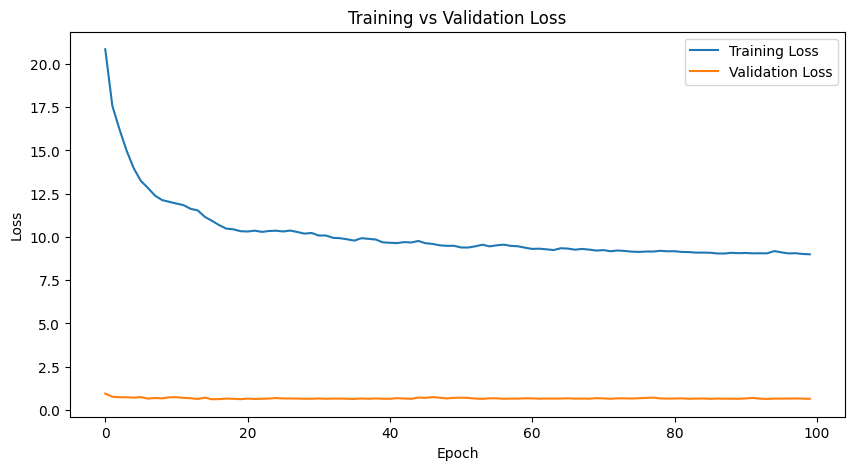

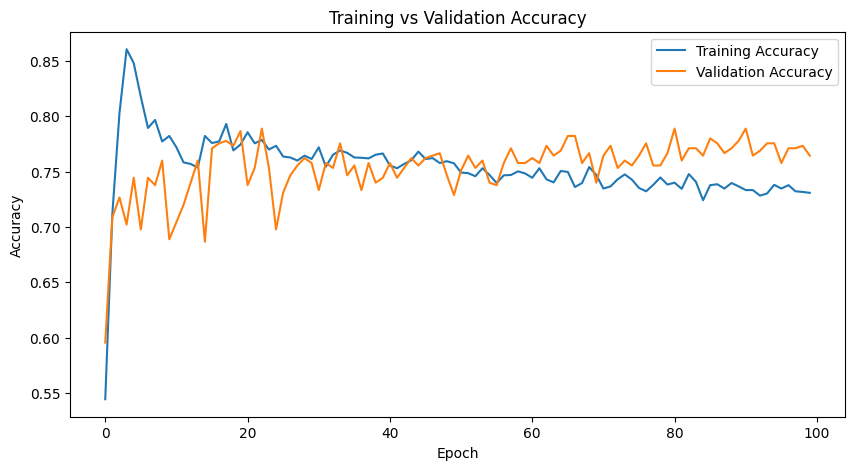

In [ ]:
# Training on Task 4 with LwF
print("Training on Task-4")
print()

train_lwf(
    model=model,
    device=device,
    x_train_new=task4_img_train,
    t_train_new=task4_label_train,
    soft_targets_old=soft_targets_task3,
    x_val_new=task4_img_val,
    t_val_new=task4_label_val,
    optimizer=optimizer,
    epoch=100,
    temperature=2.0,
    alpha=0.5,
    patience=100,
    save_path=save_path  # Specify the save path
)

Trained on Task-4

Testing on the first task:



<ipython-input-48-42c4617f9c1e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


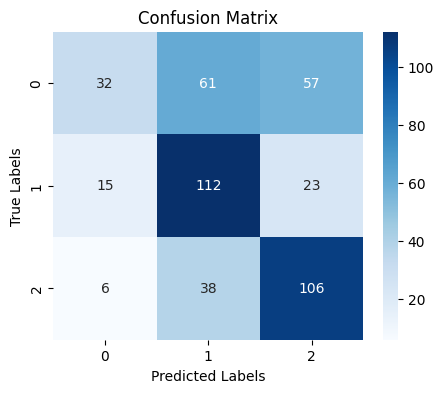

Test loss 1.0151013135910034
Test accuracy 0.5833333333333334

Testing on the second task:



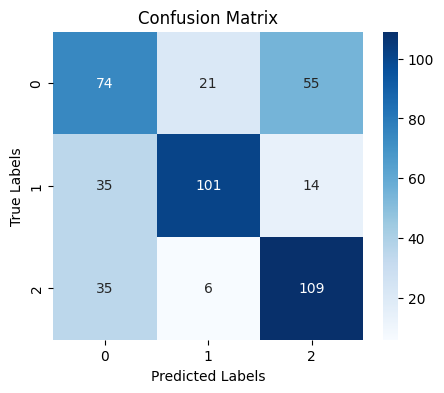

Test loss 0.9189141849676769
Test accuracy 0.5916666666666667

Testing on the third task:



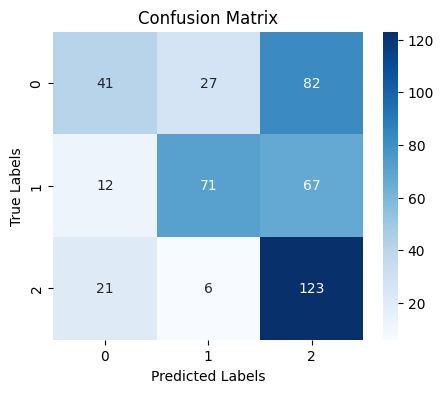

Test loss 0.9385650793711344
Test accuracy 0.5520833333333334

Testing on the fourth task:



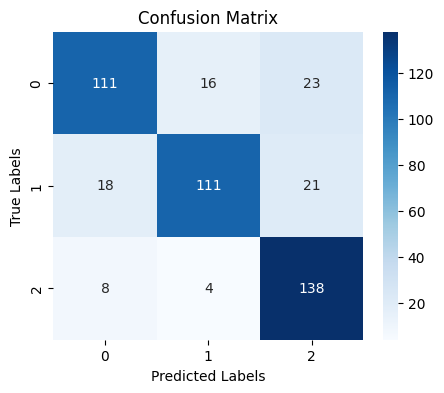

Test loss 0.6402774413426717
Test accuracy 0.75

Average Accuracy: 0.6192708333333333%


In [ ]:
# Load the saved best model
model.load_state_dict(torch.load(save_path))

# Put the model on the correct device
model.to(device)

print("Trained on Task-4")
print()

print("Testing on the first task:")
print()

t1_loss_on_task4, t1_acc_on_task4 = test(model=model,
    dataloader=task1_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the second task:")
print()

t2_loss_on_task4, t2_acc_on_task4 = test(model=model,
    dataloader=task2_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the third task:")
print()

t3_loss_on_task4, t3_acc_on_task4 = test(model=model,
    dataloader=task3_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the fourth task:")
print()

t4_loss_on_task4, t4_acc_on_task4 = test(model=model,
    dataloader=task4_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print(f"Average Accuracy: {(t1_acc_on_task4 + t2_acc_on_task4 + t3_acc_on_task4 + t4_acc_on_task4)/4}%")